In [17]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from collections import Counter

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

Load the data set - 40 subjects, each with 10 pictures

In [2]:
# Extract the zip file
with zipfile.ZipFile('/content/Faces.zip' , 'r') as zip_ref:
    zip_ref.extractall('/content/Faces')

In [3]:
# Set directory to access pictures
face_data = '/content/Faces' 

In [4]:
# Initialize lists to hold the data for each picture and its label
X_data = []
y_data = []

In [5]:
# Iterate through dataset directory
for dir_name in os.listdir(face_data):
    if os.path.isdir(os.path.join(face_data, dir_name)):
        label = dir_name
        for img_name in os.listdir(os.path.join(face_data, dir_name)):
            img_path = os.path.join(face_data, dir_name, img_name)
            img = Image.open(img_path).convert('L')  # convert to grayscale
            img_array = np.array(img)
            img_flattened = img_array.flatten() # flatten from 2D array to 1D array
            X_data.append(img_flattened)
            y_data.append(label)

In [6]:
# Accessing the data for a specific set
set_number = 's19' 
set_images = [img for img, label in zip(X_data, y_data) if label == set_number]

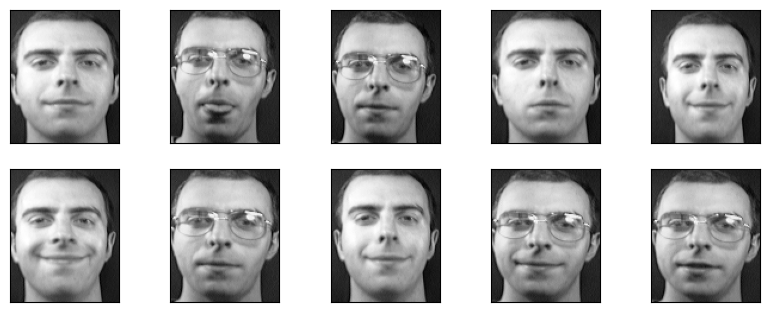

In [7]:
# Print the images from the specified set
plt.figure(figsize=(10, 10))
for i, img in enumerate(set_images):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape((112, 92)), cmap=plt.cm.gray) # reshape back to original to visualize
plt.show()

Random Forest

In [8]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=21)

In [9]:
model = RandomForestClassifier()

In [10]:
# Fit the Random Forest Classifier on the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
print("Classification Report: \n", classification_report(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

          s1       1.00      1.00      1.00         1
         s10       1.00      1.00      1.00         3
         s11       0.67      1.00      0.80         2
         s12       1.00      1.00      1.00         4
         s13       1.00      1.00      1.00         3
         s14       1.00      1.00      1.00         3
         s15       1.00      1.00      1.00         2
         s16       1.00      0.75      0.86         4
         s17       1.00      1.00      1.00         1
         s18       1.00      1.00      1.00         2
         s19       1.00      0.50      0.67         2
          s2       0.00      0.00      0.00         0
         s20       1.00      1.00      1.00         4
         s21       1.00      1.00      1.00         2
         s22       1.00      1.00      1.00         1
         s23       1.00      1.00      1.00         1
         s24       0.50      1.00      0.67         1
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Exploration of Results

In [13]:
# Finding Misclassified images

# Convert y_test and y_pred to numpy arrays
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

# Find indices of misclassified examples
misclassified_indices = np.where(y_test_array != y_pred_array)[0]

# Create dataframe of misclassified examples
misclassified_df = pd.DataFrame({
    'True Label': y_test_array[misclassified_indices],
    'Predicted Label': y_pred_array[misclassified_indices]
})

misclassified_df

,True Label,Predicted Label
0,s40,s5
1,s32,s2
2,s16,s24
3,s19,s11


In [14]:
# Inspecting the distribution of training and test sets

# Count occurrences of each label in the training set
train_label_counts = Counter(y_train)

# Count occurrences of each label in the test set
test_label_counts = Counter(y_test)

# Display the counts
print("Training label counts:", train_label_counts)
print("Test label counts:", test_label_counts)

Training label counts: Counter({'s2': 10, 's23': 9, 's24': 9, 's5': 9, 's1': 9, 's28': 9, 's17': 9, 's22': 9, 's18': 8, 's27': 8, 's31': 8, 's35': 8, 's15': 8, 's21': 8, 's26': 8, 's19': 8, 's38': 8, 's39': 8, 's30': 8, 's11': 8, 's29': 8, 's13': 7, 's6': 7, 's9': 7, 's34': 7, 's32': 7, 's10': 7, 's8': 7, 's33': 7, 's14': 7, 's36': 6, 's40': 6, 's3': 6, 's7': 6, 's37': 6, 's4': 6, 's20': 6, 's12': 6, 's16': 6, 's25': 6})
Test label counts: Counter({'s3': 4, 's4': 4, 's37': 4, 's7': 4, 's40': 4, 's12': 4, 's20': 4, 's36': 4, 's16': 4, 's25': 4, 's33': 3, 's8': 3, 's6': 3, 's13': 3, 's32': 3, 's34': 3, 's10': 3, 's9': 3, 's14': 3, 's19': 2, 's11': 2, 's39': 2, 's27': 2, 's31': 2, 's35': 2, 's21': 2, 's38': 2, 's18': 2, 's15': 2, 's30': 2, 's29': 2, 's26': 2, 's5': 1, 's1': 1, 's22': 1, 's23': 1, 's28': 1, 's17': 1, 's24': 1})


Visualization for Random Forest

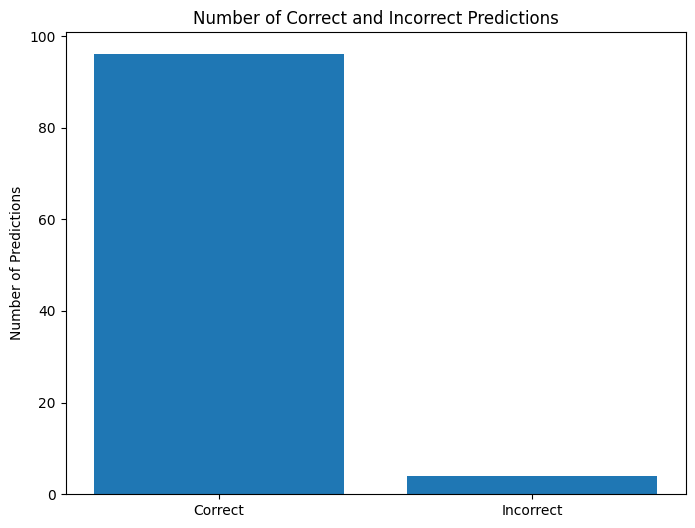

In [15]:
# Calculate number of correct and incorrect predictions
correct_predictions = sum(y_test == y_pred)
incorrect_predictions = sum(y_test != y_pred)

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(["Correct", "Incorrect"], [correct_predictions, incorrect_predictions])
plt.ylabel("Number of Predictions")
plt.title("Number of Correct and Incorrect Predictions")
plt.show()